Text(0.5, 1.0, 'Face')

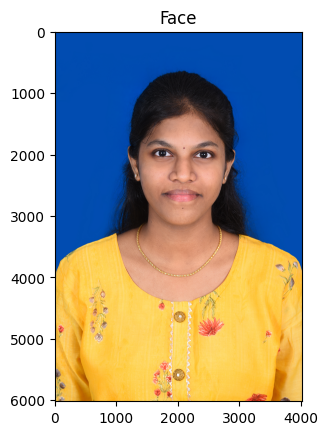

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
faceImage = cv2.imread('643.JPG')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [3]:
faceImage.shape

(6016, 4016, 3)

In [4]:
desired_width  = 413
desired_height = 531
dim = (desired_width, desired_height)

# Resize the image.

faceImage = cv2.resize(faceImage, dsize = dim, interpolation = cv2.INTER_AREA)


In [5]:
faceImage.shape

(531, 413, 3)

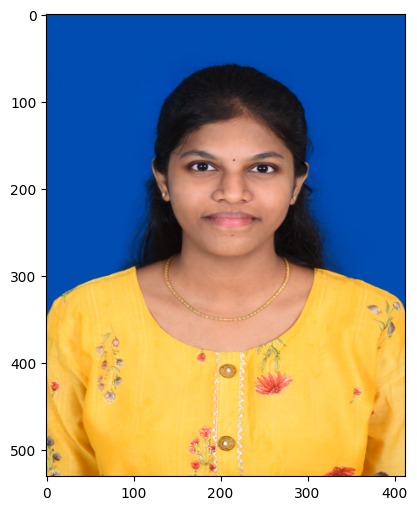

In [6]:
plt.figure(figsize = (6, 6))
plt.imshow(faceImage[:, :, ::-1]);

In [7]:
faceImage.shape

(531, 413, 3)

Text(0.5, 1.0, 'glassPNG')

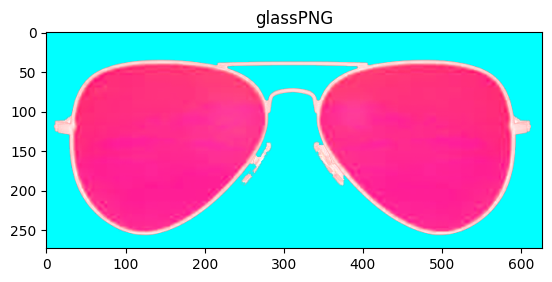

In [8]:
glassPNG = cv2.imread('sunglass-png-aviator-sunglass-png-pic-627.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [2]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(190,70))
print("image Dimension ={}".format(glassPNG.shape))

NameError: name 'glassPNG' is not defined

In [18]:
glassPNG.shape

(70, 190, 4)

In [19]:
# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

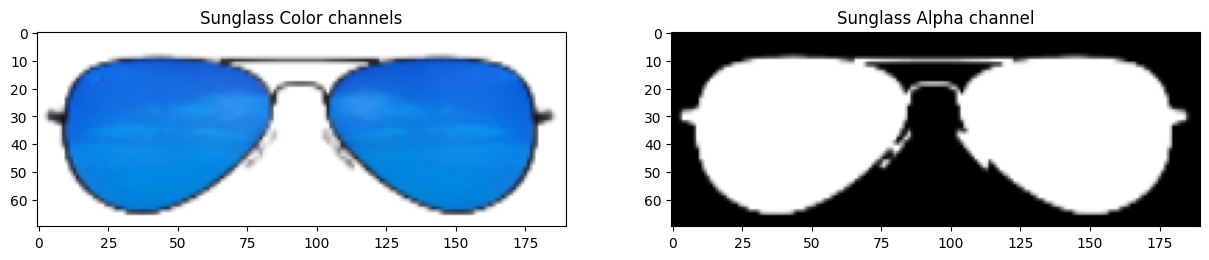

In [20]:
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

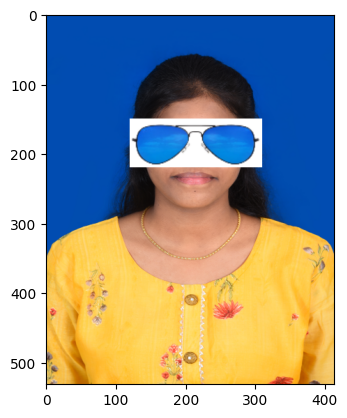

In [31]:
faceWithGlassesNaive = faceImage.copy()
# Replace the eye region with the sunglass image
faceWithGlassesNaive[150:220, 120:310]=glassBGR

plt.imshow(faceWithGlassesNaive[...,::-1])

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

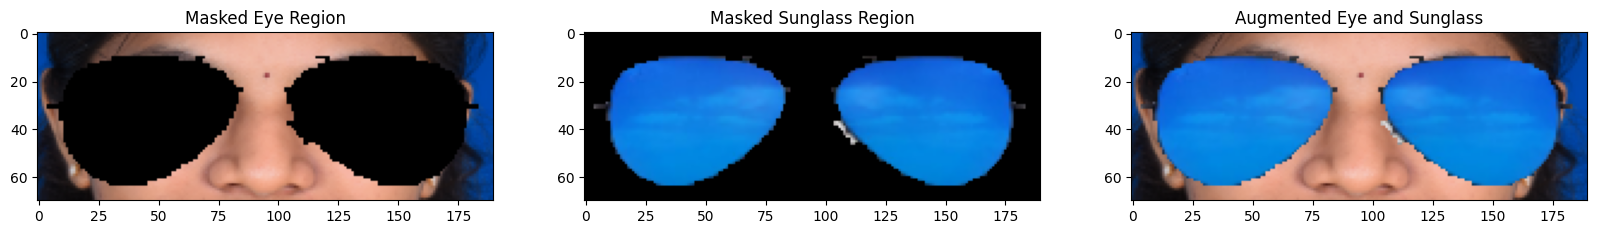

In [32]:
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))
glassMask = np.uint8(glassMask/255)
faceWithGlassesArithmetic = faceImage.copy()
eyeROI= faceWithGlassesArithmetic[150:220, 120:310]
maskedEye = cv2.multiply(eyeROI,(1-glassMask ))
maskedGlass = cv2.multiply(glassBGR,glassMask)
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

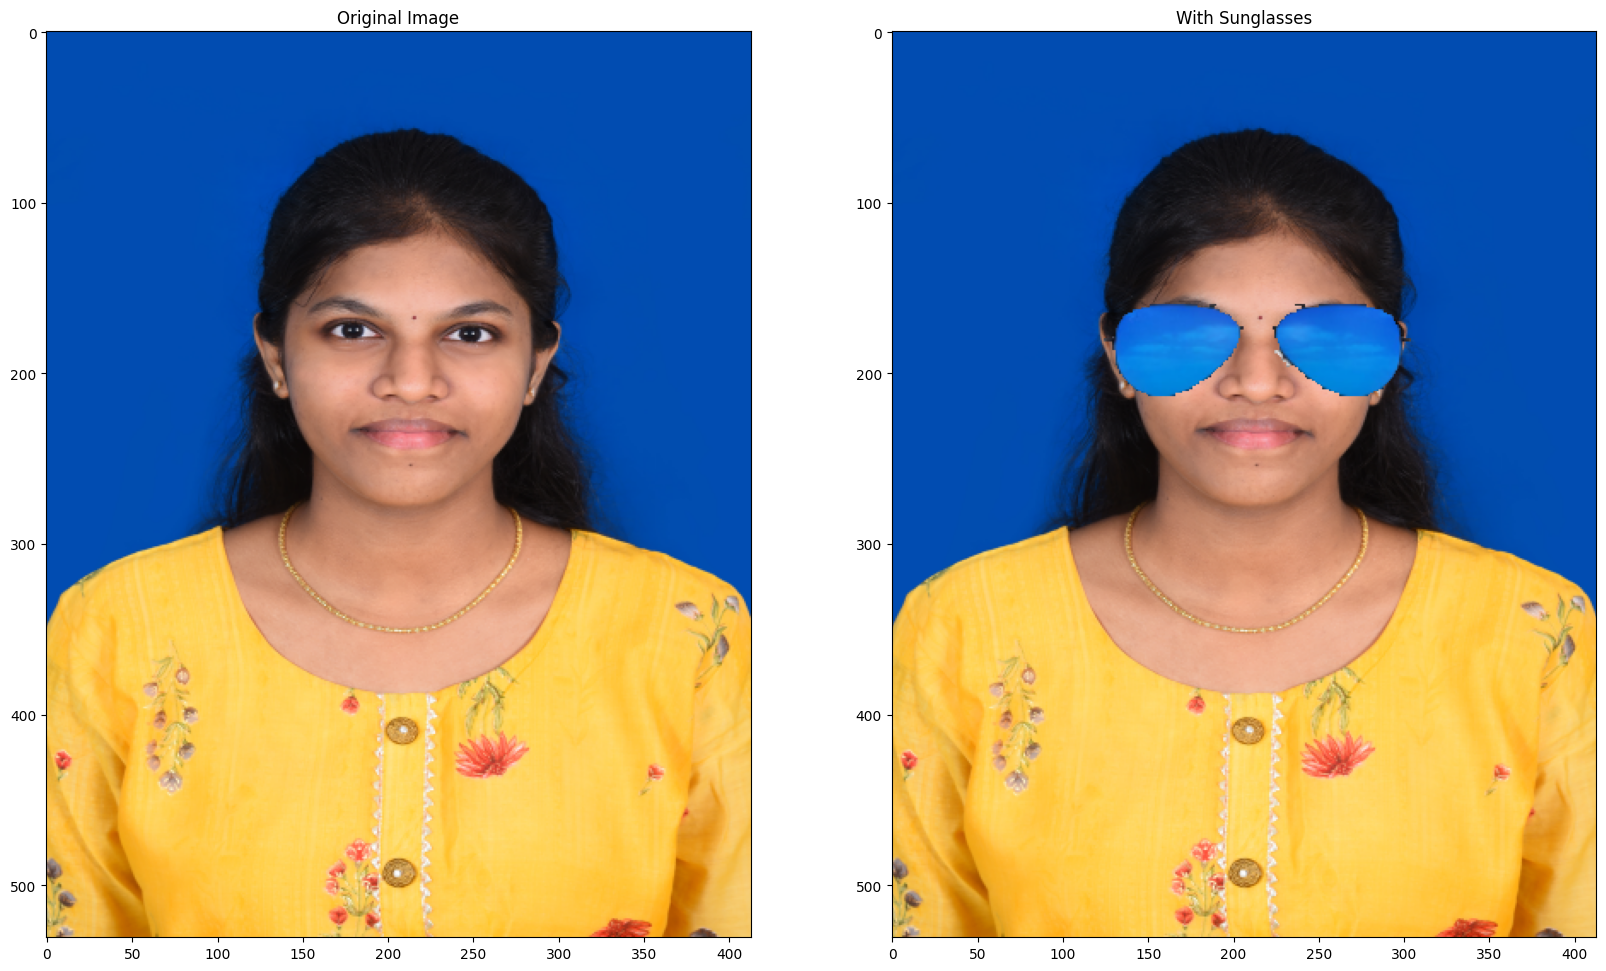

In [35]:
faceWithGlassesArithmetic[150:220, 120:310]=eyeRoiFinal
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");